##### Install libs needed

In [1]:
!pip3 install torch 
!pip3 install torchvision
!pip3 install torchtext
!pip3 install pandas
!pip3 install nltk
!pip3 install -U scikit-learn scipy matplotlib
!pip3 install spacy
!pip3 install transformers
!pip3 install seaborn
!pip3 install graphviz
!pip3 install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.

##### Import libs 

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import re
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import seaborn as sns
from collections import Counter

In [3]:
is_cuda = torch.cuda.is_available
# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, CPU used")
# device = torch.device("cpu")

GPU is available


In [4]:
# Download the stopwords from online
nltk.download('stopwords')
ntst = stopwords.words('english')
print(ntst)
print(len(ntst))

from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)
print(len(STOP_WORDS))

# Merge stopwords from two libs
stwords = set(ntst).union(STOP_WORDS)
print(stwords)
print(len(stwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'amount', 'first', 'after', 'again', 'upon', 'whereby', 'name', 'often', 'using', 'unless', 'moreover', "'s", 'doing', 'within', 'eight', "'m", 'say', 'twenty', 'toward', 'has', 'up', 'they', 'put', 'across', 'move', 'another', 'thereby', 'thus', 'nor', 'indeed', '’d', 'hereby', 'get', 'at', 'one', 'less', 'ourselves', 'three', 'hundred', 'everything', 'would', 'their', 'among', 'quite', 'should', 'empty', '‘s', 'own', 'hereupon', 'itself', 'part', 'seemed', 'four', 'else', 'it', 'back', 'someone', 'every', 'him', 'really', 'much', 'noone', 'last', 'nine', 'twelve', 'below', 'except', 'all', 'since', 'top', 'many', 'now', 'everywhere', 'nobody', 'beyond', 'through', 'please', 'made', 'who', 'due', 'some', 'herein', 'whereas', 'bottom', 'yourselves', 'either', "'re", 'together', 'become', 'were', 'whence', 'an', 'mine', 'always', 'until', 'none', 'third', 'very', 'seeming', 'this', 'whither', 'still', 'your', 'per', 'see', 'do', 'himself', "'ll", 'keep', 'then', 'before', 'side', 'hers

In [5]:
# String input
def deleteStopwords(row):
    text = str(row['text'])
    tx_arr = text.split()
    [w for w in tx_arr if w not in stwords]
    row['text'] = ' '.join( [w for w in tx_arr if w not in stwords])
    return row

def remove_punctuation(row):
    row['text'] = str(row['text']).translate(str.maketrans('', '', string.punctuation))
    # Chinese punctuation
    pattern = r'[。，“”‘’！？：；【】《》「」『』（）［］〔〕]'
    # Use re.sub() to replace all matches with an empty string
    row['text'] = re.sub(pattern, '', row['text'])
    return row

def removeEmpty(row):
    text = str(row['text'])
    if text.isspace() or len(text) <= 0:
        row['text'] = np.NaN
    return row

def load_csv(file_path):
    df = pd.read_csv(file_path)
    df.columns = ["id","title","text","label"]
    df.drop(labels=['id','title'], axis='columns', inplace=True)
   
    df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
    df = df.apply(remove_punctuation, axis=1)
    df = df.apply(deleteStopwords, axis=1)
    df = df.apply(removeEmpty, axis=1)
    df = df.dropna(subset = ["text"], how='all')
    return df

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
df = load_csv('/content/gdrive/My Drive/NLP/WELFake_Dataset.csv')
df.info

<ipython-input-5-1316616d9e95>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


<bound method DataFrame.info of                                                     text  label
0      comment expected barack obama members fyf911 f...      1
1                                     post votes hillary      1
2      demonstrators gathered night exercising consti...      1
3      dozen politically active pastors came private ...      0
4      rs 28 sarmat missile dubbed satan 2 replace ss...      1
...                                                  ...    ...
72129  washington reuters hackers believed working ru...      0
72130  know fantasyland republicans questioned citize...      1
72131  migrants refuse leave train refugee camp hunga...      0
72132  mexico city reuters donald trump combative sty...      0
72133  goldman sachs endorses hillary clinton preside...      1

[71387 rows x 2 columns]>

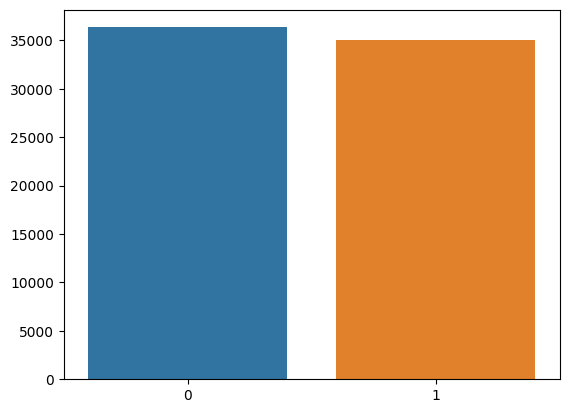

In [8]:
data_count = df['label'].value_counts()
sns.barplot(x=np.array([0,1]),y=data_count.values)
plt.show()

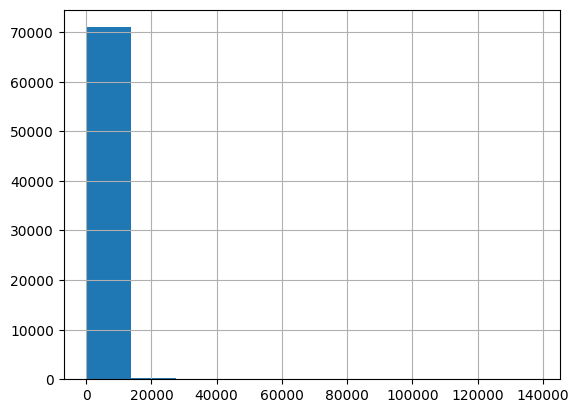

count     71387.000000
mean       2148.511494
std        2386.054493
min           1.000000
25%         929.000000
50%        1602.000000
75%        2683.000000
max      138188.000000
dtype: float64

In [9]:
rev_len = [len(i) for i in  df['text']]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [10]:
df_zero = df[df['label']==0]
df_one = df[df['label']==1]

print('length of sentences with label zero : %4d' % (len(df_zero)))
print('length of sentences with label one: %4d' % (len(df_one)))

length of sentences with label zero : 35026
length of sentences with label one: 36361


In [11]:
train_length = int(min(len(df_zero) * 0.8, len(df_one) * 0.8))
print('length of each train set: %4d ' % (train_length))

zero_train, zero_test = train_test_split(df_zero, train_size=train_length, shuffle=True, random_state=36)
one_train, one_test = train_test_split(df_one,  train_size=train_length, shuffle=True, random_state=36)

train, test = pd.concat([zero_train, one_train]), pd.concat([zero_test, one_test])
print('length of final train set: %4d' % (len(train)))
print('length of final test set: %4d' % (len(test)))

length of each train set: 28020 
length of final train set: 56040
length of final test set: 15347


In [12]:
def tockenize(x_train, y_train, x_val, y_val):
    word_list = []
    for sent in x_train:
      for word in sent.split():
        word_list.append(word)

    corpus = Counter(word_list)
    print(len(corpus))
    # sorting on the basis of most common words
    corpus_sorted = sorted(corpus, key=corpus.get, reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_sorted)}
    # tockenize
    final_list_train, final_list_test = [],[]

    for sent in x_train:
            final_list_train.append([onehot_dict[word] for word in sent.split() 
                                     if word in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[word] for word in sent.split() 
                                    if word in onehot_dict.keys()])

    # encoded_train = [label for label in y_train]  
    # encoded_test = [label for label in y_val] 
    return np.array(final_list_train), np.array(y_train), np.array(final_list_test), np.array(y_val), onehot_dict

In [13]:
x_train, y_train, x_test, y_test, vocab = tockenize(train['text'], train['label'], test['text'], test['label'])

215185


<ipython-input-12-bc21d36c80c5>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(y_train), np.array(final_list_test), np.array(y_val), onehot_dict


In [14]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


In [15]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [16]:
x_train_pad = padding_(x_train,700)
x_test_pad = padding_(x_test,700)

In [17]:
print(x_train_pad)
print(len(x_train_pad))

print(x_test_pad)
print(len(x_test_pad))

[[  0   0   0 ... 427 902 182]
 [  0   0   0 ...   1 131 127]
 [  0   0   0 ... 315 360 873]
 ...
 [  0   0   0 ... 988 533 708]
 [  0   0   0 ... 243 892   2]
 [  0   0   0 ...  58  23  58]]
56040
[[  0   0   0 ...   1   7  96]
 [  0   0   0 ...   2  58 754]
 [  0   0   0 ... 621   9   9]
 ...
 [  0   0   0 ... 199 945 626]
 [  0   0   0 ... 119 172 851]
 [  0   0   0 ... 458 889 521]]
15347


In [18]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders 
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)

In [19]:
for sample_x, sample_y in train_loader:
  print(sample_x)
  print('Sample input size: ', sample_x.size()) # batch_size, seq_length
  print('Sample input: \n', sample_x)
  print('Sample input: \n', sample_y)
  break


tensor([[  0,   0,   0,  ..., 162, 806,   1],
        [  0,   0,   0,  ..., 330, 199,  64],
        [  0,   0,   0,  ...,  20,   6,  75],
        ...,
        [  0,   0,   0,  ..., 199, 945, 626],
        [  0,   0,   0,  ...,  70, 715,  20],
        [  0,   0,   0,  ..., 315, 105,   1]])
Sample input size:  torch.Size([50, 700])
Sample input: 
 tensor([[  0,   0,   0,  ..., 162, 806,   1],
        [  0,   0,   0,  ..., 330, 199,  64],
        [  0,   0,   0,  ...,  20,   6,  75],
        ...,
        [  0,   0,   0,  ..., 199, 945, 626],
        [  0,   0,   0,  ...,  70, 715,  20],
        [  0,   0,   0,  ..., 315, 105,   1]])
Sample input: 
 tensor([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0])


In [20]:
class ConvModel(nn.Module):
    def __init__(self, num_words, embedding_dim, dropout1, dropout2, num_classes):
        super(ConvModel, self).__init__()
        self.embedding = nn.Embedding(num_words, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 64, kernel_size=5)
        self.maxpool1 = nn.MaxPool1d(2)
        self.dropout1 = nn.Dropout(dropout1)
        self.conv2 = nn.Conv1d(64, 32, kernel_size=3)
        self.maxpool2 = nn.MaxPool1d(2, stride=2)
        self.conv3 = nn.Conv1d(32, 16, kernel_size=3, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1376, 256)
        self.dropout2 = nn.Dropout(dropout2)
        self.fc2 = nn.Linear(256, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)  # Rearrange dimensions for Conv1D
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [21]:
embedding_dim = 100
vocab_size = len(vocab) + 1 #extra 1 for padding
dropout1 = 0.4
dropout2 = 0.5

# dropout1 = 0.4
# dropout2 = 0.3

num_classes = 2

model = ConvModel(vocab_size, embedding_dim,dropout1, dropout2, num_classes)

#moving to gpu
model.to(device)

print(model)

ConvModel(
  (embedding): Embedding(1001, 100)
  (conv1): Conv1d(100, 64, kernel_size=(5,), stride=(1,))
  (maxpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.4, inplace=False)
  (conv2): Conv1d(64, 32, kernel_size=(3,), stride=(1,))
  (maxpool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 16, kernel_size=(3,), stride=(2,))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1376, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [22]:
# define a function count the trainable parameters for a model
def count_trainable_parameters(model):
  total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  print("Total Trainable Parameters:", total_params)

# Calculate the trainable parameters
count_trainable_parameters(model)

Total Trainable Parameters: 492918


In [23]:
import torch.optim as optim

# function to predict accuracy
def num_of_acc(pred,label):
    _, predicted = torch.max(pred, dim=1)
    # print(predicted.shape, label.shape)
    # pred = torch.round(pred.squeeze())
    # return torch.sum(pred == label.squeeze()).item()
    return torch.sum(predicted == label.squeeze()).item()

def acc_of(model,dataloader):
    model.train(False)
    num_sample = 0
    accnum = 0
    for X, y in dataloader:
      num_sample += len(X)
      X, y = X.to(device), y.to(device)
      # print(X.shape, y.shape)
      outputs = model(X)
      batch_acc = num_of_acc(outputs,y)
      accnum += batch_acc
    return (accnum / num_sample)

# criterion = nn.CrossEntropyLoss()  # Assuming your classification task has multiple classes
criterion = nn.MultiMarginLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust the learning rate as needed
num_epochs = 100  # Define the number of training epochs

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    train_acc = 0.0
    num_sample = 0
    for i ,(X, y) in enumerate(train_loader):
        num_sample += len(X)
        X, y = X.to(device), y.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs = model(X)
        # print(outputs.shape, y.shape)
        batch_acc = num_of_acc(outputs,y)
        train_acc += batch_acc
        loss = criterion(outputs, y)
        # Perform backward pass
        loss.backward()
        optimizer.step()
    # Print the loss for monitoring the training progress
    val_acc = acc_of(model, valid_loader)
    print('Epoch:%3d, Loss:%.5f, train_acc:%.5f, val_acc:%.5f' % (epoch + 1, loss.item(), train_acc / num_sample, val_acc))

/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:200: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [50, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:26.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:200: UserWarning: An output with one or more elements was resized since it had shape [], which does not match the required output shape [40, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to z

Epoch:  1, Loss:0.08125, train_acc:0.72621, val_acc:0.83430
Epoch:  2, Loss:0.17422, train_acc:0.84177, val_acc:0.85587
Epoch:  3, Loss:0.07201, train_acc:0.85410, val_acc:0.86388
Epoch:  4, Loss:0.08577, train_acc:0.86449, val_acc:0.87665
Epoch:  5, Loss:0.13449, train_acc:0.87272, val_acc:0.88121
Epoch:  6, Loss:0.03999, train_acc:0.87957, val_acc:0.88662
Epoch:  7, Loss:0.17576, train_acc:0.88681, val_acc:0.89516
Epoch:  8, Loss:0.10074, train_acc:0.89208, val_acc:0.90070
Epoch:  9, Loss:0.06068, train_acc:0.89784, val_acc:0.90519
Epoch: 10, Loss:0.09453, train_acc:0.90580, val_acc:0.90949
Epoch: 11, Loss:0.13374, train_acc:0.91074, val_acc:0.91236
Epoch: 12, Loss:0.07584, train_acc:0.91433, val_acc:0.90584
Epoch: 13, Loss:0.12491, train_acc:0.91658, val_acc:0.91803
Epoch: 14, Loss:0.07186, train_acc:0.91979, val_acc:0.91138
Epoch: 15, Loss:0.09190, train_acc:0.92254, val_acc:0.92298
Epoch: 16, Loss:0.02508, train_acc:0.92322, val_acc:0.92357
Epoch: 17, Loss:0.13921, train_acc:0.926

In [24]:
from torchviz import make_dot

for i ,(X, y) in enumerate(train_loader):
  X = X.to(device)
  y = model(X)
  make_dot(y, params=dict(list(model.named_parameters()))).render("torchviz", format="png")
  break

AUC ROC :
0.9308073169886103
----------------------------------------------------------


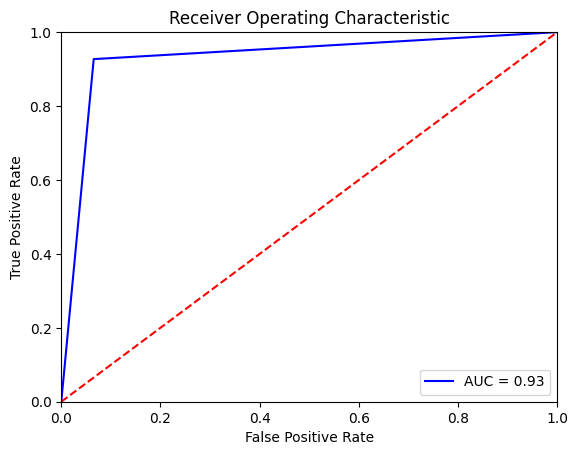

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
def plot_auc_roc(model,valid_loader, version='title'):
    y_pred = []
    y_true = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader :
    
            inputs, labels = inputs.to(device), labels.to(device)

            output = model(inputs)
            _, output = torch.max(output, dim=1)
            # output = (output > threshold).int()

            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())
    
    print('AUC ROC :')
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    print(roc_auc)
    print('----------------------------------------------------------')
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_auc_roc(model, valid_loader) 